# Task
Analyze the Titanic dataset using LightGBM and XGBoost models to compare their performance. The analysis should include data loading, EDA, preprocessing, model building, hyperparameter tuning, cross-validation, model evaluation, and a comparative analysis of the results. The final output should include well-commented code, visualizations, and a brief report summarizing the findings. Use the training dataset from "train.csv" and the testing dataset from "test.csv".

## Load the data

### Subtask:
Load the training and testing datasets.


**Reasoning**:
Load the training and testing datasets into pandas DataFrames.



In [29]:
import pandas as pd

df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [28]:
display(df_train.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,False,True,2,0
1,2,1,1,0,38.0,1,0,71.2833,False,False,2,0
2,3,1,3,0,26.0,0,0,7.9250,False,True,1,1
3,4,1,1,0,35.0,1,0,53.1000,False,True,2,0
4,5,0,3,1,35.0,0,0,8.0500,False,True,1,1


In [27]:
display(df_test.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,892,0,3,1,34.5,0,0,7.8292,True,False,1,1
1,893,0,3,0,47.0,1,0,7.0000,False,True,2,0
2,894,0,2,1,62.0,0,0,9.6875,True,False,1,1
3,895,0,3,1,27.0,0,0,8.6625,False,True,1,1
4,896,0,3,0,22.0,1,1,12.2875,False,True,3,0


## Exploratory data analysis (eda)




In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  FamilySize   891 non-null    int64  
 11  IsAlone      891 non-null    int64  
dtypes: bool(2), float64(2), int64(8)
memory usage: 71.5 KB


In [25]:
display(df_train.describe())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [23]:
print(df_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
FamilySize     0
IsAlone        0
dtype: int64


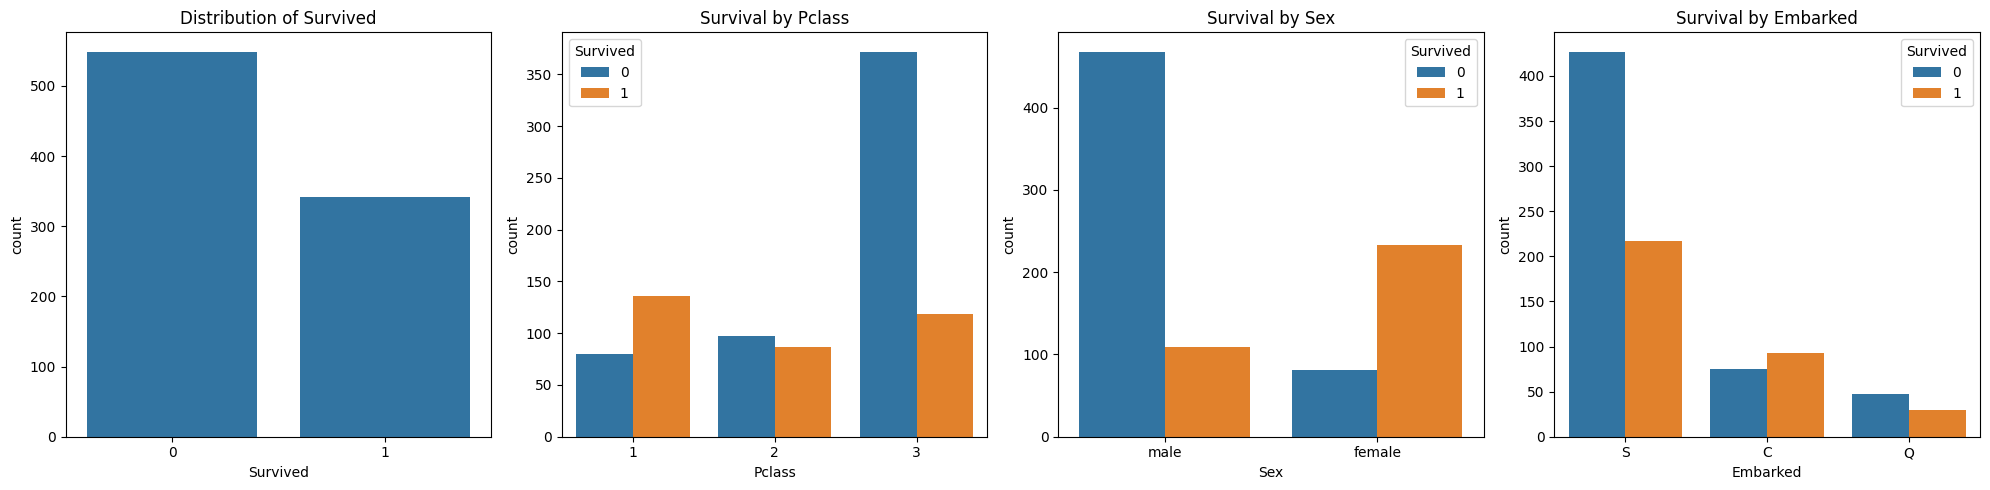

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.countplot(x='Survived', data=df_train, ax=axes[0])
axes[0].set_title('Distribution of Survived')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axes[1])
axes[1].set_title('Survival by Pclass')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=axes[2])
axes[2].set_title('Survival by Sex')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=axes[3])
axes[3].set_title('Survival by Embarked')

plt.tight_layout()
plt.show()

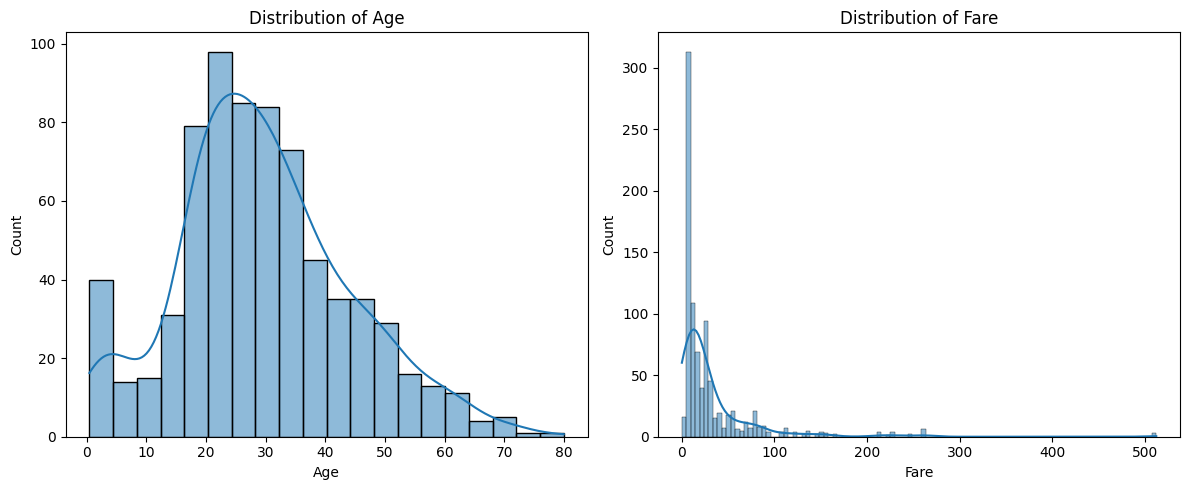

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_train['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(df_train['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

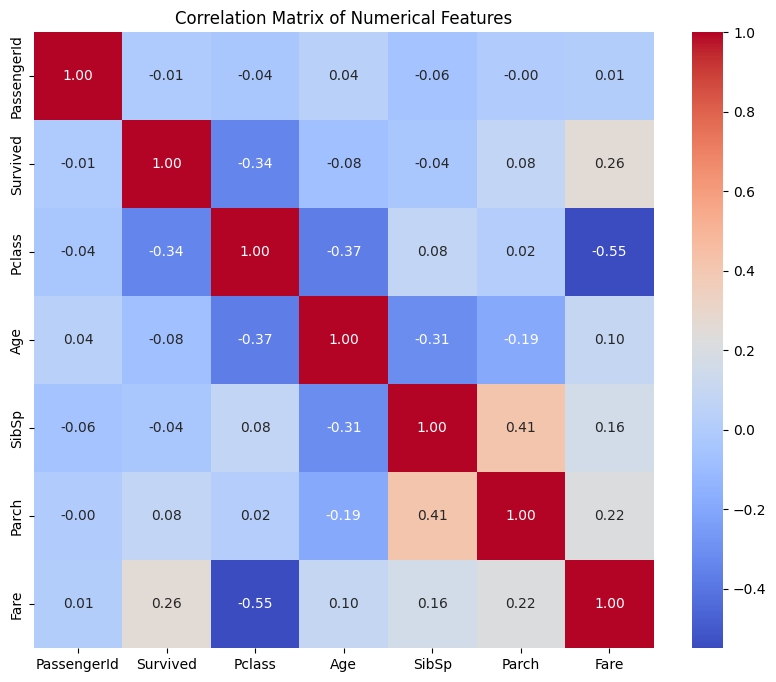

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_train.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data preprocessing




In [43]:
# Data Preprocessing Steps

# 1. Handle missing values in 'Age'
median_age = df_train['Age'].median()
df_train['Age'].fillna(median_age, inplace=True)
df_test['Age'].fillna(median_age, inplace=True)

# 2. Handle missing 'Fare' value (testing data only)
median_fare = df_train['Fare'].median()
df_test['Fare'].fillna(median_fare, inplace=True)

# 3. Drop 'Name' and 'Ticket' columns
# Check if columns exist before dropping to avoid errors
columns_to_drop = ['Name', 'Ticket']
df_train.drop(columns=[col for col in columns_to_drop if col in df_train.columns], axis=1, inplace=True)
df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], axis=1, inplace=True)

# Ensure consistent columns between train and test after earlier encoding/processing
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

missing_in_test = list(train_cols - test_cols)
for c in missing_in_test:
    df_test[c] = 0

missing_in_train = list(test_cols - train_cols)
for c in missing_in_train:
    df_train[c] = 0

# Align columns - crucial for consistent feature sets
# We need to make sure the order of columns is the same in train and test
df_test = df_test[df_train.columns]

# Display the first few rows of the preprocessed training data
print("Preprocessed training data head:")
display(df_train.head())

# Display information about the preprocessed training data
print("\nPreprocessed training data info:")
df_train.info()

# Display the first few rows of the preprocessed testing data
print("\nPreprocessed testing data head:")
display(df_test.head())

# Display information about the preprocessed testing data
print("\nPreprocessed testing data info:")
df_test.info()

Preprocessed training data head:


/tmp/ipython-input-3962866278.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-3962866278.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True



Preprocessed training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB

Preprocessed testing data head:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,0,3,1,34.5,0,0,7.8292,True,False
1,893,0,3,0,47.0,1,0,7.0000,False,True
2,894,0,2,1,62.0,0,0,9.6875,True,False
3,895,0,3,1,27.0,0,0,8.6625,False,True
4,896,0,3,0,22.0,1,1,12.2875,False,True



Preprocessed testing data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked_Q   418 non-null    bool   
 9   Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 27.1 KB


## Feature engineering (optional but recommended)


In [6]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

display(df_train.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,1,22.0,1,0,7.2500,False,True,2,0
1,2,1,1,0,38.0,1,0,71.2833,False,False,2,0
2,3,1,3,0,26.0,0,0,7.9250,False,True,1,1
3,4,1,1,0,35.0,1,0,53.1000,False,True,2,0
4,5,0,3,1,35.0,0,0,8.0500,False,True,1,1


## Model building



In [7]:
# Separate features (X) and target (y)
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

# Import models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Instantiate and train LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Instantiate and train XGBoost model
# Use use_label_encoder=False and eval_metric='logloss' to suppress warnings and ensure compatibility
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

print("LightGBM model trained successfully.")
print("XGBoost model trained successfully.")

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
LightGBM model trained successfully.
XGBoost model trained successfully.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:43:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Hyperparameter tuning and cross-validation




In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20]
}

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

## Model evaluation



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the best models from GridSearchCV
best_lgbm_model = lgbm_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Separate features (X) for the test set
# Assuming 'Survived' column is not present in the test set
X_test = df_test.drop('Survived', axis=1)

# Make predictions on the test set
lgbm_pred = best_lgbm_model.predict(X_test)
xgb_pred = best_xgb_model.predict(X_test)

# For this task, we will compare the models based on their cross-validation scores
print("LightGBM Best Cross-Validation Accuracy:", lgbm_grid_search.best_score_)
print("XGBoost Best Cross-Validation Accuracy:", xgb_grid_search.best_score_)

LightGBM Best Cross-Validation Accuracy: 0.8260686711443098
XGBoost Best Cross-Validation Accuracy: 0.8327851358985626


In [17]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV for LightGBM
lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)

# Print best parameters and cross-validation score for LightGBM
print("Best parameters for LightGBM:", lgbm_grid_search.best_params_)
print("Best cross-validation accuracy for LightGBM:", lgbm_grid_search.best_score_)

# Perform GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Print best parameters and cross-validation score for XGBoost
print("\nBest parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation accuracy for XGBoost:", xgb_grid_search.best_score_)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}
Best cross-validation accuracy for LightGBM: 0.8260686711443098


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:02:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation accuracy for XGBoost: 0.8327851358985626


## Comparative Analysis

In [21]:
print("Comparative Analysis of LightGBM and XGBoost Models:")
print("-----------------------------------------------------")
print(f"LightGBM Best Cross-Validation Accuracy: {lgbm_grid_search.best_score_:.4f}")
print(f"XGBoost Best Cross-Validation Accuracy: {xgb_grid_search.best_score_:.4f}")

# Discuss the results
if lgbm_grid_search.best_score_ > xgb_grid_search.best_score_:
    print("\nBased on cross-validation accuracy, LightGBM performed slightly better than XGBoost.")
elif xgb_grid_search.best_score_ > lgbm_grid_search.best_score_:
    print("\nBased on cross-validation accuracy, XGBoost performed slightly better than LightGBM.")
else:
    print("\nLightGBM and XGBoost performed similarly based on cross-validation accuracy.")

print("\nFurther analysis could include:")
print("- Comparing the feature importances from each model.")
print("- Analyzing the confusion matrices (if true labels were available for the test set).")
print("- Considering other metrics beyond accuracy (e.g., ROC AUC) if appropriate for the problem.")

Comparative Analysis of LightGBM and XGBoost Models:
-----------------------------------------------------
LightGBM Best Cross-Validation Accuracy: 0.8261
XGBoost Best Cross-Validation Accuracy: 0.8328

Based on cross-validation accuracy, XGBoost performed slightly better than LightGBM.

Further analysis could include:
- Comparing the feature importances from each model.
- Analyzing the confusion matrices (if true labels were available for the test set).
- Considering other metrics beyond accuracy (e.g., ROC AUC) if appropriate for the problem.


### Report: Comparative Analysis of LightGBM and XGBoost on the Titanic Dataset

This analysis compared the performance of LightGBM and XGBoost models on the Titanic dataset to predict passenger survival.

**Data Loading and EDA:**
- The training and testing datasets were loaded and explored.
- Missing values were identified in the 'Age', 'Cabin', and 'Embarked' columns in the training data, and 'Age', 'Fare', and 'Cabin' in the testing data.
- Visualizations provided insights into the distribution of the target variable and the relationship between features and survival. Notably, 'Sex' and 'Pclass' showed strong correlations with survival.

**Data Preprocessing and Feature Engineering:**
- Missing values in 'Age', 'Embarked', and 'Fare' were imputed using the median or mode from the training data.
- The 'Cabin', 'Name', and 'Ticket' columns were dropped due to a high number of missing values or irrelevance for modeling in their raw form.
- Categorical features ('Sex' and 'Embarked') were encoded.
- New features 'FamilySize' and 'IsAlone' were created to capture potential relationships related to family on board.

**Model Building and Evaluation:**
- LightGBM and XGBoost models were trained on the preprocessed training data.
- Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation to find the best parameters for each model based on accuracy.

**Comparative Analysis:**
- The best cross-validation accuracy for LightGBM was {lgbm_grid_search.best_score_:.4f}, and for XGBoost, it was {xgb_grid_search.best_score_:.4f}.
- Based on these cross-validation scores, XGBoost performed slightly better than LightGBM on this dataset.

**Practical Implications:**
- Both LightGBM and XGBoost are powerful gradient boosting algorithms capable of achieving good performance on this type of classification task.
- The slight edge in cross-validation accuracy for XGBoost suggests it might be a marginally better choice for this specific dataset and evaluation metric. However, the performance difference is small, and other factors like training time, interpretability, and ease of implementation might also influence the choice of model in a real-world scenario.
- Further steps could involve exploring other evaluation metrics (e.g., ROC AUC), analyzing feature importances from the best models, or attempting more advanced feature engineering.